In [1]:
import requests

In [2]:
URL = 'https://www.opensecrets.org/races/summary?cycle=2020&id=TN02&spec=N'

response = requests.get(URL)

In [3]:
type(response)

requests.models.Response

In [4]:
response.text

'<!DOCTYPE html>\n<!--[if lte IE 8]><html class="no-js lte-ie9 lte-ie8" lang="en" dir="ltr"><![endif]-->\n<!--[if IE 9]><html class="no-js lte-ie9" lang="en" dir="ltr"><![endif]-->\n<!--[if gt IE 9]><!-->\n<html class="no-js" lang="en" dir="ltr">\n<!--<![endif]-->\n<head>\n  <!-- Google Tag Manager -->\n  <script>\n    (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n      new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n      j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n      \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n      })(window,document,\'script\',\'dataLayer\',\'GTM-MKPRXNV\');\n  </script>\n  <!-- End Google Tag Manager -->\n  <meta charset="utf-8">\n<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRJS-b7f93d6e9afef1935a5","applicationID":"1109265918","transactionName":"d

In [5]:
from bs4 import BeautifulSoup as BS

In [6]:
soup = BS(response.text)

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lte IE 8]><html class="no-js lte-ie9 lte-ie8" lang="en" dir="ltr"><![endif]-->
<!--[if IE 9]><html class="no-js lte-ie9" lang="en" dir="ltr"><![endif]-->
<!--[if gt IE 9]><!-->
<html class="no-js" dir="ltr" lang="en">
 <!--<![endif]-->
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
      new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
      j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
      'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
      })(window,document,'script','dataLayer','GTM-MKPRXNV');
  </script>
  <!-- End Google Tag Manager -->
  <meta charset="utf-8"/>
  <script type="text/javascript">
   window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRJS-b7f93d6e9afef1935a5","applicationID":"1109265918","transactionName":"dFpeQkdcWQoGRE1DV1tcRF9WWlQIE

In [8]:
soup.findAll('table')

[<table class="DataTable">
 <thead>
 <tr>
 <th>Candidate</th>
 <th class="number">Raised</th>
 <th class="number">Spent</th>
 <th class="number">Cash on Hand</th>
 <th>Last Report</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td class="races-category red" nowrap="">
 <a href="/members-of-congress/tim-burchett/summary?cid=N00041594">Tim Burchett (R)</a>
  • <i>Incumbent</i> • <span class="winner"><i>Winner</i></span> </td>
 <td class="number">$1,336,276</td>
 <td class="number">$878,488</td>
 <td class="number">$593,678</td>
 <td>12/31/2020</td>
 </tr>
 <tr>
 <td class="races-category blue" nowrap="">
 								Renee Hoyos (D)
 						</td>
 <td class="number">$812,784</td>
 <td class="number">$816,793</td>
 <td class="number">$210</td>
 <td>12/31/2020</td>
 </tr>
 </tbody>
 </table>,
 <table class="DataTable">
 <thead>
 <tr>
 <th>Candidate</th>
 <th class="number">Supported</th>
 <th class="number">Opposed</th>
 <th class="number">All 2020 Total<br/>
 							(Supported and Opposed)</th>
 </tr>


In [9]:
table_html = str(soup.find('table', attrs={'class' : 'DataTable'}))

In [10]:
from IPython.core.display import HTML

HTML(table_html)

Candidate,Raised,Spent,Cash on Hand,Last Report
Tim Burchett (R) • Incumbent • Winner,"$1,336,276","$878,488","$593,678",12/31/2020
Renee Hoyos (D),"$812,784","$816,793",$210,12/31/2020


In [12]:
import pandas as pd

In [16]:
table1=pd.read_html(str(soup.find('table', attrs={'class' : 'DataTable'})))[0]

In [31]:
table1

,Candidate,Raised,Spent,Cash on Hand,Last Report
0,Tim Burchett (R) • Incumbent • Winner,"$1,336,276","$878,488","$593,678",12/31/2020
1,Renee Hoyos (D),"$812,784","$816,793",$210,12/31/2020


In [30]:
table1.columns

Index(['Candidate', 'Raised', 'Spent', 'Cash on Hand', 'Last Report'], dtype='object')

In [97]:
delim=table1.iloc[0,0][18]
import numpy as np

In [60]:
tokens=table1.iloc[:,0].apply(lambda x: x.split(delim))
tokens.apply(lambda x: x[0].strip()[-2])
tokens

0    [Tim Burchett (R)  ,  Incumbent ,  Winner]
1                             [Renee Hoyos (D)]
Name: Candidate, dtype: object

In [48]:
tokens=table1.iloc[1,0].split(delim)

In [50]:
tokens[0].strip()[-2]

'D'

In [14]:
soup.findAll('title')

[<title>Tennessee District 02 2020 Race • OpenSecrets</title>,
 <title>Email</title>,
 <title>Email</title>]

In [69]:
soup.findAll('title')[0].text.split(' ')

['Tennessee', 'District', '02', '2020', 'Race', '•', 'OpenSecrets']

In [147]:
#from here it is a loop per page
num_tables = 10
all_data = [None] * num_tables
for district in range(0,num_tables):
    URL = 'https://www.opensecrets.org/races/summary?cycle=2020&id=TN0%s&spec=N' % (district+1)
    response = requests.get(URL)
    soup = BS(response.text)

    temp_tbl=pd.read_html(str(soup.find('table', attrs={'class' : 'DataTable'})))[0]
    tile_info=soup.findAll('title')[0].text.split(' ')
    temp_tbl['State'] = tile_info[0]
    temp_tbl['District'] = tile_info[2]
    all_data[district] = temp_tbl
df = pd.concat(all_data)
df

,Candidate,Raised,Spent,Cash on Hand,Last Report,State,District
0,Diana Harshbarger (R) • Winner,"$2,126,946","$1,869,100","$257,846",12/31/2020,Tennessee,01
1,Blair Nicole Walsingham (D),"$140,209","$134,995","$5,215",10/14/2020,Tennessee,01
0,Tim Burchett (R) • Incumbent • Winner,"$1,336,276","$878,488","$593,678",12/31/2020,Tennessee,02
1,Renee Hoyos (D),"$812,784","$816,793",$210,12/31/2020,Tennessee,02
0,Chuck Fleischmann (R) • Incumbent • Winner,"$1,051,653","$381,411","$1,880,341",12/31/2020,Tennessee,03
1,Meg Gorman (D),"$85,843","$77,760","$8,083",12/31/2020,Tennessee,03
0,Scott Desjarlais (R) • Incumbent • Winner,"$331,464","$392,499","$302,649",12/31/2020,Tennessee,04
1,Christopher Hale (D),"$308,731","$302,996","$5,735",12/31/2020,Tennessee,04
0,Jim Cooper (D) • Incumbent • Winner,"$936,569","$1,332,131","$272,934",12/31/2020,Tennessee,05
0,John Rose (R) • Incumbent • Winner,"$1,050,429","$625,688","$454,375",12/31/2020,Tennessee,06


In [309]:
#tokens=df.iloc[:,0].apply(lambda x: x.split(delim))


In [310]:
#type(tokens)

In [110]:
import re

In [111]:
my_string = 'Diana Harshbarger (R) , Winner'

In [114]:
winner=re.findall(r"Winner", my_string)

In [115]:
winner

['Winner']

In [117]:
party=re.findall(r"\(.*?\)", my_string)

In [118]:
party

['(R)']

In [125]:
name=re.findall(r"^[a-zA-Z]+\s[a-zA-Z]+\s", my_string)

In [126]:
name

['Diana Harshbarger ']

In [132]:
inc_string= "Tim Burchett (R) , Incumbent , Winner"
incumbent=re.findall(r"Incumbent", inc_string)

['Incumbent']

In [157]:
all_names =df.iloc[:,0].apply(lambda x: re.findall(r"^[a-zA-Z]+\s[a-zA-Z]+\s",x)[0])
all_party = df.iloc[:,0].apply(lambda x: re.findall(r"\(.*?\)", x)[0])
all_incumbents = df.iloc[:,0].apply(lambda x: np.nan if len(re.findall(r"Incumbent", x)) == 0 else re.findall(r"Incumbent", x)[0]) 
all_wins = df.iloc[:,0].apply(lambda x: np.nan if len(re.findall(r"Winner$", x)) ==0 else re.findall(r"Winner$", x)[0])     


In [158]:
df_all=(df.assign(Name=all_names, Party=all_party, Incumbent=all_incumbents, Win=all_wins))
df_all

,Candidate,Raised,Spent,Cash on Hand,Last Report,State,District,Name,Party,Incumbent,Win
0,Diana Harshbarger (R) • Winner,"$2,126,946","$1,869,100","$257,846",12/31/2020,Tennessee,01,Diana Harshbarger,(R),NaN,Winner
1,Blair Nicole Walsingham (D),"$140,209","$134,995","$5,215",10/14/2020,Tennessee,01,Blair Nicole,(D),NaN,NaN
0,Tim Burchett (R) • Incumbent • Winner,"$1,336,276","$878,488","$593,678",12/31/2020,Tennessee,02,Tim Burchett,(R),Incumbent,Winner
1,Renee Hoyos (D),"$812,784","$816,793",$210,12/31/2020,Tennessee,02,Renee Hoyos,(D),NaN,NaN
0,Chuck Fleischmann (R) • Incumbent • Winner,"$1,051,653","$381,411","$1,880,341",12/31/2020,Tennessee,03,Chuck Fleischmann,(R),Incumbent,Winner
1,Meg Gorman (D),"$85,843","$77,760","$8,083",12/31/2020,Tennessee,03,Meg Gorman,(D),NaN,NaN
0,Scott Desjarlais (R) • Incumbent • Winner,"$331,464","$392,499","$302,649",12/31/2020,Tennessee,04,Scott Desjarlais,(R),Incumbent,Winner
1,Christopher Hale (D),"$308,731","$302,996","$5,735",12/31/2020,Tennessee,04,Christopher Hale,(D),NaN,NaN
0,Jim Cooper (D) • Incumbent • Winner,"$936,569","$1,332,131","$272,934",12/31/2020,Tennessee,05,Jim Cooper,(D),Incumbent,Winner
0,John Rose (R) • Incumbent • Winner,"$1,050,429","$625,688","$454,375",12/31/2020,Tennessee,06,John Rose,(R),Incumbent,Winner


In [311]:
df_all.shape

(21, 11)

In [175]:
#df_all[['Raised', 'Spent','Cash on Hand']].apply(pd.to_numeric)

In [324]:
#x = df_all.iloc[:,1].apply(lambda x: re.sub(r"[$]","", x))[0]
#df_all.iloc[:,1:4] = df_all.iloc[:,1:4].replace('[$,()]', '', regex=True).astype(float)

In [325]:
df_all.head()

,Candidate,Raised,Spent,Cash on Hand,Last Report,State,District,Name,Party,Incumbent,Win
0,Diana Harshbarger (R) • Winner,2126946.0,1869100.0,257846.0,12/31/2020,Tennessee,01,Diana Harshbarger,(R),NaN,Winner
1,Blair Nicole Walsingham (D),140209.0,134995.0,5215.0,10/14/2020,Tennessee,01,Blair Nicole,(D),NaN,NaN
0,Tim Burchett (R) • Incumbent • Winner,1336276.0,878488.0,593678.0,12/31/2020,Tennessee,02,Tim Burchett,(R),Incumbent,Winner
1,Renee Hoyos (D),812784.0,816793.0,210.0,12/31/2020,Tennessee,02,Renee Hoyos,(D),NaN,NaN
0,Chuck Fleischmann (R) • Incumbent • Winner,1051653.0,381411.0,1880341.0,12/31/2020,Tennessee,03,Chuck Fleischmann,(R),Incumbent,Winner


In [328]:
df_all.sort_values('Raised', ascending= False)

,Candidate,Raised,Spent,Cash on Hand,Last Report,State,District,Name,Party,Incumbent,Win
0,Diana Harshbarger (R) • Winner,2126946.0,1869100.0,257846.0,12/31/2020,Tennessee,01,Diana Harshbarger,(R),NaN,Winner
0,Ron Estes (R) • Incumbent • Winner,1993808.0,1420188.0,844164.0,12/31/2020,Kansas,04,Ron Estes,(R),Incumbent,Winner
0,David Kustoff (R) • Incumbent • Winner,1641217.0,999285.0,713832.0,12/31/2020,Tennessee,08,David Kustoff,(R),Incumbent,Winner
0,Tim Burchett (R) • Incumbent • Winner,1336276.0,878488.0,593678.0,12/31/2020,Tennessee,02,Tim Burchett,(R),Incumbent,Winner
0,Mark Green (R) • Incumbent • Winner,1194960.0,935487.0,287889.0,12/31/2020,Tennessee,07,Mark Green,(R),Incumbent,Winner
0,Chuck Fleischmann (R) • Incumbent • Winner,1051653.0,381411.0,1880341.0,12/31/2020,Tennessee,03,Chuck Fleischmann,(R),Incumbent,Winner
0,John Rose (R) • Incumbent • Winner,1050429.0,625688.0,454375.0,12/31/2020,Tennessee,06,John Rose,(R),Incumbent,Winner
0,Jim Cooper (D) • Incumbent • Winner,936569.0,1332131.0,272934.0,12/31/2020,Tennessee,05,Jim Cooper,(D),Incumbent,Winner
1,Renee Hoyos (D),812784.0,816793.0,210.0,12/31/2020,Tennessee,02,Renee Hoyos,(D),NaN,NaN
0,Steve Cohen (D) • Incumbent • Winner,607570.0,457311.0,1216119.0,12/31/2020,Tennessee,09,Steve Cohen,(D),Incumbent,Winner


In [307]:
#df_all.loc['Raised']= df.loc['Raised'].apply(lambda x: re.sub(r"[$]","", x))

In [ ]:
#all_state_tables = 50
#one_table=[None]*all_state_tables

In [261]:
url_britannica='https://www.britannica.com/topic/United-States-House-of-Representatives-Seats-by-State-1787120'
response_britannica= requests.get(url_britannica)

In [263]:
response_britannica.status_code

200

In [264]:
response_britannica.text

'<!doctype html>\n\n<html data-ytrk-page="TOPIC PAGINATED SMALL" lang="en" class="ui-unknown0 ui-unknown">\n\n<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">\n\n    <meta charset="utf-8">\n    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n\n    <meta property="fb:pages" content="74442380906" />\n\n\t<link rel="dns-prefetch" href="https://cdn.britannica.com/mendel-resources/3-52">\n\t<link rel="preconnect" href="https://cdn.britannica.com/mendel-resources/3-52">\n\n    <meta name="description" content="The U.S. Congress consists of two houses, the House of Representatives and the Senate. Each state elects two senators, while seats in the House of Representatives are apportioned by state according to population, with each state receiving a minimum of one representative. After each decennial" />\n\n    <meta name="keywords" content="United States House of Representatives S

In [268]:
soup_brittanica= BS(response_britannica.text)
print(soup_brittanica.prettify())

<!DOCTYPE html>
<html class="ui-unknown0 ui-unknown" data-ytrk-page="TOPIC PAGINATED SMALL" lang="en">
 <head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="74442380906" property="fb:pages"/>
  <link href="https://cdn.britannica.com/mendel-resources/3-52" rel="dns-prefetch"/>
  <link href="https://cdn.britannica.com/mendel-resources/3-52" rel="preconnect"/>
  <meta content="The U.S. Congress consists of two houses, the House of Representatives and the Senate. Each state elects two senators, while seats in the House of Representatives are apportioned by state according to population, with each state receiving a minimum of one representative. After each decennial" name="description"/>
  <meta content="United States House of Representatives Seats by State, encyclopedia, encyclopeadia, britannic

In [270]:
soup_brittanica.find('table')

<table>
<caption>
    U.S. congressional apportionment
  </caption>
<thead>
<tr>
<th id="s">
        state
      </th>
<th id="r">
        representatives
      </th>
</tr>
</thead>
<tbody>
<tr>
<td headers="s" scope="row">
        Alabama
      </td>
<td headers="r">
        7
      </td>
</tr>
<tr>
<td headers="s" scope="row">
        Alaska
      </td>
<td headers="r">
        1
      </td>
</tr>
<tr>
<td headers="s" scope="row">
        Arizona
      </td>
<td headers="r">
        9
      </td>
</tr>
<tr>
<td headers="s" scope="row">
        Arkansas
      </td>
<td headers="r">
        4
      </td>
</tr>
<tr>
<td headers="s" scope="row">
        California
      </td>
<td headers="r">
        53
      </td>
</tr>
<tr>
<td headers="s" scope="row">
        Colorado
      </td>
<td headers="r">
        7
      </td>
</tr>
<tr>
<td headers="s" scope="row">
        Connecticut
      </td>
<td headers="r">
        5
      </td>
</tr>
<tr>
<td headers="s" scope="row">
        Delaware
 

In [334]:
repres_table=pd.read_html(str(soup_brittanica.find('table')))[0]

In [277]:
#repres_table=repres_table[:-1]

,state,representatives
0,Alabama,7
1,Alaska,1
2,Arizona,9
3,Arkansas,4
4,California,53
5,Colorado,7
6,Connecticut,5
7,Delaware,1
8,Florida,27
9,Georgia,14


In [285]:
all_states = pd.read_csv('./us_states.txt')
#all_states=pd.merge(left=repres_table, right= all_states)

In [282]:
#all_states=all_states.rename(columns={'State': 'state'})

In [331]:
all_states.head()
#range(all_states.shape[0])

,state,representatives,Abbreviation
0,Alabama,7,AL
1,Alaska,1,AK
2,Arizona,9,AZ
3,Arkansas,4,AR
4,California,53,CA


In [335]:
import os
if os.path.exists("./df1.csv"):
    df1 = pd.read_csv("./df1.csv")
else:
    all_data = []
    for idx_row in range(all_states.shape[0]):
        state = all_states.iloc[idx_row, 2]
        num_reps = int(all_states.iloc[idx_row, 1])
        #iterate through all districts given the number of reps in all_states
        for rep in range(num_reps):
            if rep < 9:
                rep_string = '0%s' % (rep + 1)
            else:
                rep_string = '%s' % rep
            url = 'https://www.opensecrets.org/races/summary?cycle=2020&id=%s%s&spec=N' % (state, rep_string)
            response = requests.get(url)
            soup = BS(response.text)

            temp_tbl=pd.read_html(str(soup.find('table', attrs={'class' : 'DataTable'})))[0]
            tile_info=soup.findAll('title')[0].text.split(' ')
            temp_tbl['State'] = tile_info[0]
            temp_tbl['District'] = tile_info[2]
            all_data.append(temp_tbl)

    df1 = pd.concat(all_data)
    df1.to_csv('./df1.csv')

In [337]:
df1

,Candidate,Raised,Spent,Cash on Hand,Last Report,State,District
0,Jerry Carl (R) • Winner,"$1,971,321","$1,859,349","$111,973",12/31/2020,Alabama,01
1,James Averhart (D),"$80,095","$78,973","$1,122",12/31/2020,Alabama,01
0,Barry Moore (R) • Winner,"$650,807","$669,368","-$13,633",12/31/2020,Alabama,02
1,Phyllis Harvey-Hall (D),"$56,050","$55,988",$0,12/31/2020,Alabama,02
0,Mike D Rogers (R) • Incumbent • Winner,"$1,193,111","$1,218,564","$502,234",12/31/2020,Alabama,03
...,...,...,...,...,...,...,...
1,Tricia Zunker (D),"$1,261,957","$1,232,690","$29,267",12/31/2020,Wisconsin,07
0,Mike Gallagher (R) • Incumbent • Winner,"$3,202,905","$2,841,801","$1,169,362",12/31/2020,Wisconsin,08
1,Amanda Stuck (D),"$416,978","$399,916","$2,165",12/31/2020,Wisconsin,08
0,Liz Cheney (R) • Incumbent • Winner,"$3,003,883","$3,060,167","$153,567",12/31/2020,Wyoming,01


In [361]:
df1[:3]

,Candidate,Raised,Spent,Cash on Hand,Last Report,State,District
0,Jerry Carl (R) • Winner,"$1,971,321","$1,859,349","$111,973",12/31/2020,Alabama,01
1,James Averhart (D),"$80,095","$78,973","$1,122",12/31/2020,Alabama,01
0,Barry Moore (R) • Winner,"$650,807","$669,368","-$13,633",12/31/2020,Alabama,02


In [362]:
df1['Candidate'].iloc[3]

'Phyllis Harvey-Hall (D)'

In [346]:
df1.iloc[:, 0]

0                    Jerry Carl (R)  • Winner
1                          James Averhart (D)
0                   Barry Moore (R)  • Winner
1                     Phyllis Harvey-Hall (D)
0     Mike D Rogers (R)  • Incumbent • Winner
                       ...                   
1                           Tricia Zunker (D)
0    Mike Gallagher (R)  • Incumbent • Winner
1                            Amanda Stuck (D)
0        Liz Cheney (R)  • Incumbent • Winner
1                      Lynnette Grey Bull (D)
Name: Candidate, Length: 893, dtype: object

In [364]:
# df1.iloc[:,0].apply(lambda x: re.findall(r"^[a-zA-Z]+\s[a-zA-Z]+\s",x)[0])
for ix in range(df1.shape[0]):
    try:
         re.findall(r"[a-zA-Z]+\s[a-zA-Z]+\s",df1.iloc[ix,0])[0]
    except Exception as ex:
        print(df1.iloc[ix,0])
        break
        #print(ex)
re.findall(r"[a-zA-Z]+\s[a-zA-Z]+\s",df1.iloc[3,0])

Phyllis Harvey-Hall (D)


[]

In [383]:
all_names =df1.iloc[:,0].apply(lambda x: re.findall(r"([A-Za-z]+\s*-*[A-Za-z]*\s*-*[A-Za-z]+)\s",x)[0])
all_party = df1.iloc[:,0].apply(lambda x: re.findall("\(([^)]+)", x)[0])
all_incumbents = df1.iloc[:,0].apply(lambda x: np.nan if len(re.findall(r"Incumbent", x)) == 0 else re.findall(r"Incumbent", x)[0]) 
all_wins = df1.iloc[:,0].apply(lambda x: np.nan if len(re.findall(r"Winner$", x)) ==0 else re.findall(r"Winner$", x)[0])     


In [550]:
df1_all=(df1.assign(Name=all_names, Party=all_party, Incumbent=all_incumbents, Win=all_wins))
df1_all

,Candidate,Raised,Spent,Cash on Hand,Last Report,State,District,Name,Party,Incumbent,Win
0,Jerry Carl (R) • Winner,"$1,971,321","$1,859,349","$111,973",12/31/2020,Alabama,01,Jerry Carl,R,NaN,Winner
1,James Averhart (D),"$80,095","$78,973","$1,122",12/31/2020,Alabama,01,James Averhart,D,NaN,NaN
0,Barry Moore (R) • Winner,"$650,807","$669,368","-$13,633",12/31/2020,Alabama,02,Barry Moore,R,NaN,Winner
1,Phyllis Harvey-Hall (D),"$56,050","$55,988",$0,12/31/2020,Alabama,02,Phyllis Harvey-Hall,D,NaN,NaN
0,Mike D Rogers (R) • Incumbent • Winner,"$1,193,111","$1,218,564","$502,234",12/31/2020,Alabama,03,Mike D Rogers,R,Incumbent,Winner
...,...,...,...,...,...,...,...,...,...,...,...
1,Tricia Zunker (D),"$1,261,957","$1,232,690","$29,267",12/31/2020,Wisconsin,07,Tricia Zunker,D,NaN,NaN
0,Mike Gallagher (R) • Incumbent • Winner,"$3,202,905","$2,841,801","$1,169,362",12/31/2020,Wisconsin,08,Mike Gallagher,R,Incumbent,Winner
1,Amanda Stuck (D),"$416,978","$399,916","$2,165",12/31/2020,Wisconsin,08,Amanda Stuck,D,NaN,NaN
0,Liz Cheney (R) • Incumbent • Winner,"$3,003,883","$3,060,167","$153,567",12/31/2020,Wyoming,01,Liz Cheney,R,Incumbent,Winner


In [551]:

df1_all.iloc[:,1:4] = df1_all.iloc[:,1:4].replace('[$,()]', '', regex=True).astype(float)

In [552]:
df1_all.head()

,Candidate,Raised,Spent,Cash on Hand,Last Report,State,District,Name,Party,Incumbent,Win
0,Jerry Carl (R) • Winner,1971321.0,1859349.0,111973.0,12/31/2020,Alabama,01,Jerry Carl,R,NaN,Winner
1,James Averhart (D),80095.0,78973.0,1122.0,12/31/2020,Alabama,01,James Averhart,D,NaN,NaN
0,Barry Moore (R) • Winner,650807.0,669368.0,-13633.0,12/31/2020,Alabama,02,Barry Moore,R,NaN,Winner
1,Phyllis Harvey-Hall (D),56050.0,55988.0,0.0,12/31/2020,Alabama,02,Phyllis Harvey-Hall,D,NaN,NaN
0,Mike D Rogers (R) • Incumbent • Winner,1193111.0,1218564.0,502234.0,12/31/2020,Alabama,03,Mike D Rogers,R,Incumbent,Winner


In [533]:
#df1_all.loc[df1_all['Win'] =='NaN', 'Win']= 'No'

In [560]:
df1_all.loc[pd.isna(df1_all['Win']),'Win'] ='No'
df1_all.loc[df1_all['Win'] == 'Winner','Win'] ='Yes'

In [561]:
df1_all

,Candidate,Raised,Spent,Cash on Hand,Last Report,State,District,Name,Party,Incumbent,Win
0,Jerry Carl (R) • Winner,1971321.0,1859349.0,111973.0,12/31/2020,Alabama,01,Jerry Carl,R,NaN,Yes
1,James Averhart (D),80095.0,78973.0,1122.0,12/31/2020,Alabama,01,James Averhart,D,NaN,No
0,Barry Moore (R) • Winner,650807.0,669368.0,-13633.0,12/31/2020,Alabama,02,Barry Moore,R,NaN,Yes
1,Phyllis Harvey-Hall (D),56050.0,55988.0,0.0,12/31/2020,Alabama,02,Phyllis Harvey-Hall,D,NaN,No
0,Mike D Rogers (R) • Incumbent • Winner,1193111.0,1218564.0,502234.0,12/31/2020,Alabama,03,Mike D Rogers,R,Incumbent,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1,Tricia Zunker (D),1261957.0,1232690.0,29267.0,12/31/2020,Wisconsin,07,Tricia Zunker,D,NaN,No
0,Mike Gallagher (R) • Incumbent • Winner,3202905.0,2841801.0,1169362.0,12/31/2020,Wisconsin,08,Mike Gallagher,R,Incumbent,Yes
1,Amanda Stuck (D),416978.0,399916.0,2165.0,12/31/2020,Wisconsin,08,Amanda Stuck,D,NaN,No
0,Liz Cheney (R) • Incumbent • Winner,3003883.0,3060167.0,153567.0,12/31/2020,Wyoming,01,Liz Cheney,R,Incumbent,Yes


In [562]:
df1_all['Party'].unique()

array(['R', 'D', 'I', '3', 'L'], dtype=object)

In [396]:
#df1_all.groupby('Party')['Raised'].plot(kind='bar', bins =5, edgecolor = 'black', figsize = (14,8))


In [564]:
#Top 10 states by money raised
df1_all.groupby(['State', 'District']).agg({'Raised' : 'sum'} ).sort_values('Raised',ascending= False)


,,Raised
State,District,
New,District,231824247.0
North,District,38029179.0
Louisiana,01,37262827.0
California,22,31916663.0
Kansas,04,31615738.0
...,...,...
Hawaii,01,520787.0
California,32,502050.0
Florida,24,479211.0


In [565]:
largest_by_funds_raised=df1_all.groupby(['State']).agg({'Raised' : 'max'} ).nlargest(10, 'Raised')

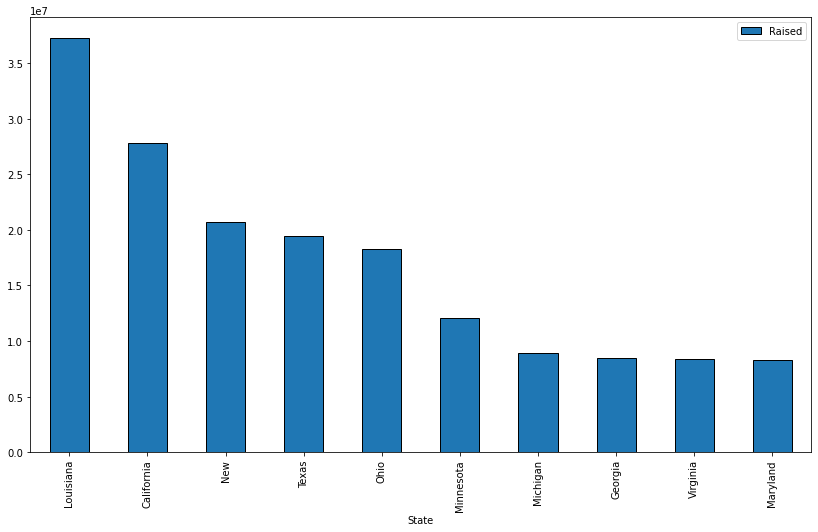

In [480]:
#top states with max amount raised
largest_by_funds_raised.plot(kind='bar',edgecolor='black',figsize=(14,8));
#plt.title("Top 10 States")    

In [566]:
#top 10 candidates by amount raised

top10_names=df1_all.sort_values('Raised', ascending=False).head(10)


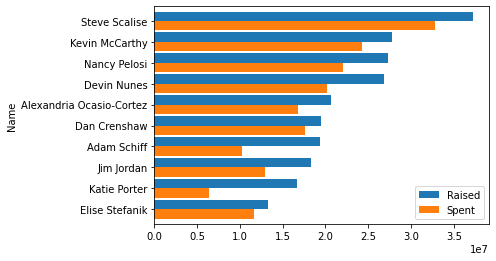

In [567]:
top10_names.plot.barh(x='Name',y=['Raised', 'Spent'], width=0.9).invert_yaxis()
#plt.xlabel('$',fontweight ='bold')
#plt.title('Top 10 candidates by amount raised in 2020', fontweight ='bold')

In [568]:
df1_all.groupby(['State']).agg({'Raised' : 'max'} ).sort_values('Raised', ascending=False).nlargest(50, 'Raised')

,Raised
State,
Louisiana,37262827.0
California,27780644.0
New,20664795.0
Texas,19427865.0
Ohio,18313823.0
Minnesota,12050564.0
Michigan,8967420.0
Georgia,8507298.0
Virginia,8387680.0


In [569]:
max_winner=pd.pivot_table(df1_all, values='Raised',index='Win', columns= 'State', aggfunc='max')

In [571]:
max_winner

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West,Wisconsin,Wyoming
Win,,,,,,,,,,,,,,,,,,,,,
No,80095.0,5178452.0,6301073.0,3482463.0,10556626.0,5008274.0,1839080.0,131394.0,6793521.0,3026243.0,...,6941746.0,812784.0,10263486.0,5613542.0,NaN,5755917.0,4130540.0,641567.0,1962443.0,134597.0
Yes,2168165.0,1922901.0,3381353.0,3384490.0,27780644.0,4136137.0,2037826.0,2024201.0,6128177.0,8507298.0,...,5766726.0,2126946.0,19427865.0,5129475.0,847320.0,8387680.0,5422491.0,2155978.0,3500849.0,3003883.0


In [572]:
min_winner=pd.pivot_table(df1_all, values='Raised',index='Win', columns= 'State', aggfunc='min')

In [573]:
df1_all[df1_all['State'] == 'Alaska']

,Candidate,Raised,Spent,Cash on Hand,Last Report,State,District,Name,Party,Incumbent,Win
0,Don Young (R) • Incumbent • Winner,1922901.0,1790448.0,249173.0,12/31/2020,Alaska,01,Don Young,R,Incumbent,Yes
1,Alyse Galvin (I),5178452.0,5088103.0,96594.0,12/31/2020,Alaska,01,Alyse Galvin,I,NaN,No


In [574]:
pd.pivot_table(df1_all, values='Raised',index='Win', columns= 'State', aggfunc='min')

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West,Wisconsin,Wyoming
Win,,,,,,,,,,,,,,,,,,,,,
No,46068.0,5178452.0,11685.0,109767.0,5921.0,1930.0,26836.0,5344.0,47.0,875.0,...,199.0,655.0,100.0,393.0,NaN,2036.0,2904.0,5207.0,35753.0,134597.0
Yes,650807.0,1922901.0,622151.0,966801.0,478426.0,478984.0,964731.0,2024201.0,412592.0,553964.0,...,977784.0,331464.0,257174.0,835139.0,847320.0,873126.0,1173464.0,869210.0,1155721.0,3003883.0


In [576]:
describe_df1_all=df1_all.groupby('Win')['Raised'].describe()

In [581]:
describe_df1_all

,count,mean,std,min,25%,50%,75%,max
Win,,,,,,,,
No,462.0,1.058869e+06,1.965197e+06,-2084.0,29749.5,144999.0,1042875.0,12050564.0
Yes,431.0,2.707978e+06,3.654797e+06,257174.0,1120978.5,1806588.0,2843336.0,37262827.0


In [579]:
import seaborn as sns

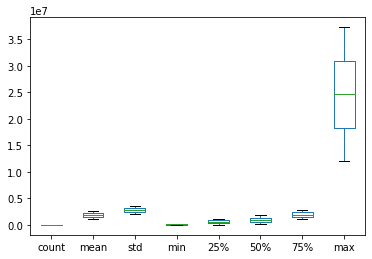

In [582]:
ax=describe_df1_all.plot.box()

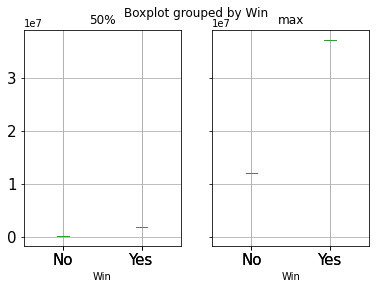

In [585]:
boxpl = describe_df1_all.boxplot(column=['50%','max'], by = 'Win', fontsize = 15)

In [ ]:
#fig, ax = plt.subplots(figsize = (14, 6))
#sns.boxplot(data = describe_df1_all)

In [590]:
import statsmodels.api as sm

In [598]:
df1_all['Win_Loss']= df1_all['Win'].apply(lambda x: 1 if 'Yes'==x else 0).astype(int)

In [620]:
base_logreg = (sm.GLM(endog = df1_all['Win_Loss'],
                      exog = sm.add_constant(df1_all[[]]), 
                      family=sm.families.Binomial())
                 .fit()
                 )

In [621]:
base_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Win_Loss   No. Observations:                  893
Model:                            GLM   Df Residuals:                      892
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -618.44
Date:                Tue, 19 Oct 2021   Deviance:                       1236.9
Time:                        12:37:11   Pearson chi2:                     893.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0695      0.067     -1.037      0.300      -0.201       0.062
==============================================================================
"""

In [605]:
df1_all['Win_Loss'].value_counts(normalize=True)

0    0.517357
1    0.482643
Name: Win_Loss, dtype: float64

In [606]:
np.exp(base_logreg.params['const'])


0.9329004329007531

In [607]:
funds_raised_logreg = (sm.GLM(endog = df1_all['Win_Loss'],
                 exog = sm.add_constant(df1_all[['Raised']]),
                 family=sm.families.Binomial())
                 .fit()
                 )

In [608]:
funds_raised_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Win_Loss   No. Observations:                  893
Model:                            GLM   Df Residuals:                      891
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -566.13
Date:                Mon, 18 Oct 2021   Deviance:                       1132.3
Time:                        15:34:59   Pearson chi2:                 1.05e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6863      0.096     -7.150      0.000      -0.874      -0.498
Raised      3.873e-07   4.64e-08      8.344      0.000    2.96e-07    4.78e-07
==============================================================================
"""

In [612]:
print(np.exp(funds_raised_logreg.params))

const     0.50343
Raised    1.00000
dtype: float64


In [639]:
x=np.linspace(start=df1_all['Raised'].min(),
            stop = df1_all['Raised'].max(),
            num = 200)

In [641]:
np.exp(funds_raised_logreg.params['const'] + funds_raised_logreg.params['Raised']*x)[:5]

array([0.50302359, 0.54085704, 0.58153603, 0.62527457, 0.67230278])

In [643]:
funds_raised_logreg.predict(sm.add_constant(x))[:5]

array([0.33467445, 0.35101053, 0.36770331, 0.38471935, 0.40202216])

In [646]:
import matplotlib.pyplot as plt

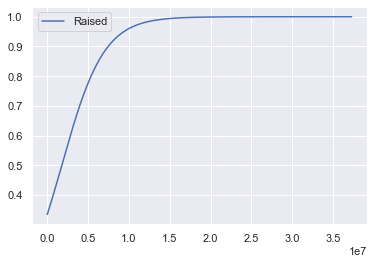

In [648]:
y=funds_raised_logreg.predict(sm.add_constant(x))
plt.plot(x,y, label = "Raised")
plt.legend();

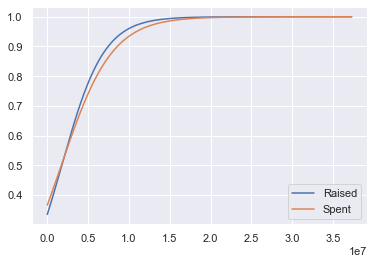

In [649]:
y=funds_raised_logreg.predict(sm.add_constant(x))
y_spent=spent_logreg.predict(sm.add_constant(x))
plt.plot(x,y, label = "Raised")
plt.plot(x,y_spent, label = "Spent")
plt.legend();

In [610]:
spent_logreg = (sm.GLM(endog = df1_all['Win_Loss'],
                 exog = sm.add_constant(df1_all[['Spent']]),
                 family=sm.families.Binomial())
                 .fit()
                 )

In [611]:
spent_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Win_Loss   No. Observations:                  893
Model:                            GLM   Df Residuals:                      891
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -581.37
Date:                Mon, 18 Oct 2021   Deviance:                       1162.7
Time:                        15:43:35   Pearson chi2:                     957.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5495      0.091     -6.016      0.000      -0.728      -0.370
Spent       3.204e-07   4.43e-08      7.231      0.000    2.34e-07    4.07e-07
==============================================================================
"""

In [613]:
print(np.exp(spent_logreg.params))

const    0.577252
Spent    1.000000
dtype: float64


In [ ]:
#fitting a logistic regression line to visualise how the p of win/loss changes with funds raised

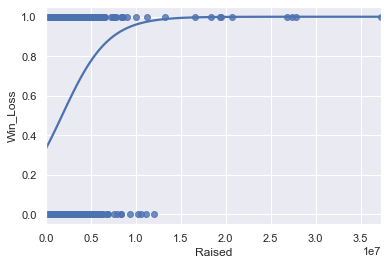

In [632]:
sns.set_theme(color_codes=True)
sns.regplot(x='Raised', y='Win_Loss',
            data=df1_all,
            logistic=True,
            ci=None);


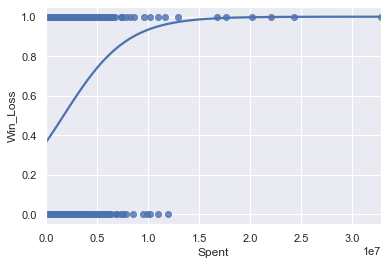

In [633]:
sns.set_theme(color_codes=True)
sns.regplot(x='Spent', y='Win_Loss',
            data=df1_all,
            logistic=True,
            ci=None);